In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import quantum as qm
import asymmetric as asym
import glob
import scipy.linalg as la
import seaborn as sns

In [5]:
colors = ["aqua", "red"]
sns.set_palette(sns.xkcd_palette(colors)+sns.color_palette("Set1", 9))

In [6]:
# Setup #
L = 4
dense = True
pert = True
if (dense): 
    fix = 'dense'
    prefix = 'data/otoc_dense'
else: 
    fix = 'sparse'
    prefix = 'data/otoc_sparse'
if (pert): 
    prefix = prefix + "_pert_"
    fix    = fix    + "_pert_"
sites = np.arange(L)
# print(prefix + "foreL" + str(L) + "v*.npy")
forenames = glob.glob(prefix + "foreL" + str(L) + "v*.npy")
backnames = glob.glob(prefix + "backL" + str(L) + "v*.npy")

In [7]:
otocsfore = []
otocsback = []
vs        = []
vsback    = []
for fname in forenames:
    otocsfore.append(np.load(fname))
    vs.append(    int(fname.replace(prefix + "foreL" + str(L) + "v", "").replace(".npy", "")))
for fname in backnames:
    otocsback.append(np.load(fname)[:,::-1])
    vsback.append(int(fname.replace(prefix + "backL" + str(L) + "v", "").replace(".npy", "")))
vs        = np.array(vs)
otocsfore = np.array(otocsfore)
otocsback = np.array(otocsback)
args      = np.argsort(vs)
vs        = vs[args]
otocsfore = otocsfore[args]
otocsback = otocsback[np.argsort(vsback)]

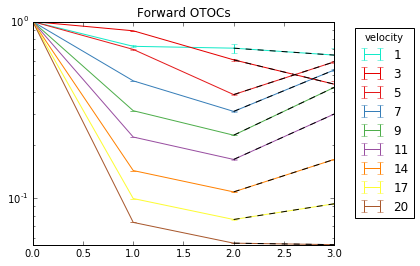

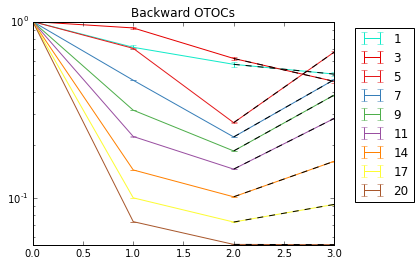

In [8]:
# Forward
ax = plt.subplot(111)
gammas_fore = []
for idx, otocfore in enumerate(otocsfore):
    mean, std = qm.mean_and_std(otocfore[::])
    ax.set_yscale("log", nonposy='clip')
    ax.errorbar(sites[::], mean, yerr=std, label = str(vs[idx]))
    x = sites[2:7:]
    y = mean[2:7:]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_fore.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title="velocity")
plt.ylim(0,1)
plt.title("Forward OTOCs")
# plt.savefig('figures/otocs_' + fix + 'foreL' + str(L) + '.pdf')
plt.show()

# Backward
ax = plt.subplot(111)
gammas_back = []
for idx, otocback in enumerate(otocsback):
    mean, std = qm.mean_and_std(otocback[::])
    ax.set_yscale("log", nonposy='clip')
    ax.errorbar(sites[::], mean, yerr=std, label = str(vs[idx]))
    x = sites[2:7:]
    y = mean[2:7:]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_back.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs")
# plt.savefig('figures/otocs_' + fix + 'backL' + str(L) + '.pdf')
plt.show()

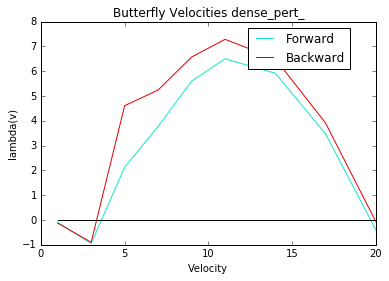

In [9]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore,  label = "Forward")
ax.plot(vs, gammas_back,  label = "Backward")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
# plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

In [ ]:
stop here

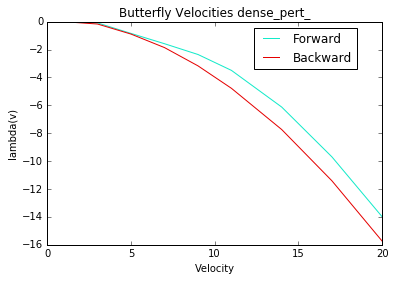

In [133]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore,  label = "Forward")
ax.plot(vs, gammas_back,  label = "Backward")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

In [10]:
np.shape(otocsfore)

(9, 4, 4)

In [13]:
print(np.average(otocsfore, axis=1))

[[ 1.          0.72469065  0.70752705  0.64657251]
 [ 1.          0.88723821  0.60764605  0.44291371]
 [ 1.          0.6961512   0.38648282  0.59166016]
 [ 1.          0.46227156  0.31045421  0.53228367]
 [ 1.          0.3133188   0.22775133  0.42435282]
 [ 1.          0.22239132  0.16609276  0.299906  ]
 [ 1.          0.14372516  0.10882497  0.16606758]
 [ 1.          0.09983215  0.07598115  0.09321447]
 [ 1.          0.07314659  0.05582464  0.05474013]]
